<a href="https://colab.research.google.com/github/vineethreddy09/vineethreddy09/blob/main/Predicting_Stock_Prices_with_Linear_Regression_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Stock Prices with Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import quandl
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

### Configure Quandl

In [ ]:
import API_config

In [ ]:
quandl.ApiConfig.api_key = API_config.API_KEY

### Get the Data

In [ ]:
start_date = datetime.date(2009, 3,8)
end_date = datetime.date.today()

data = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)
data.to_csv('data/sap_stock.csv')

In [ ]:
data.head()

Open   High    Low  Close  Change  Traded Volume     Turnover  \
Date                                                                         
2009-03-09  25.16  25.82  24.48  25.59     NaN      5749357.0  145200289.0   
2009-03-10  25.68  26.95  25.68  26.87     NaN      7507770.0  198480965.0   
2009-03-11  26.50  26.95  26.26  26.64     NaN      5855095.0  155815439.0   
2009-03-12  26.15  26.47  25.82  26.18     NaN      6294955.0  164489409.0   
2009-03-13  26.01  26.24  25.65  25.73     NaN      6814568.0  176228331.0   

           Last Price of the Day Daily Traded Units  Daily Turnover  
Date                                                                 
2009-03-09                  None               None             NaN  
2009-03-10                  None               None             NaN  
2009-03-11                  None               None             NaN  
2009-03-12                  None               None             NaN  
2009-03-13                  None               None             NaN

In [ ]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2550 entries, 2009-03-09 to 2019-03-08
Data columns (total 10 columns):
Open                     2242 non-null float64
High                     2543 non-null float64
Low                      2543 non-null float64
Close                    2550 non-null float64
Change                   11 non-null float64
Traded Volume            2504 non-null float64
Turnover                 2497 non-null float64
Last Price of the Day    0 non-null object
Daily Traded Units       0 non-null object
Daily Turnover           7 non-null float64
dtypes: float64(8), object(2)
memory usage: 219.1+ KB


In [ ]:
# Get descriptive statistics summary of data set
data.describe()

Open         High          Low        Close     Change  \
count  2242.000000  2543.000000  2543.000000  2550.000000  11.000000   
mean     56.686896    61.563225    60.535073    60.995955  -0.070000   
std      18.320821    21.184135    20.934460    21.097480   0.709761   
min      25.160000    25.820000    24.480000    25.590000  -0.740000   
25%      41.500000    43.430000    42.590000    42.950000  -0.500000   
50%      56.560000    58.480000    57.580000    58.015000  -0.290000   
75%      67.732500    78.365000    77.085000    77.762500   0.085000   
max     100.100000   108.520000   107.020000   107.800000   1.250000   

       Traded Volume      Turnover  Daily Turnover  
count   2.504000e+03  2.497000e+03             7.0  
mean    3.296818e+06  1.828440e+08             0.0  
std     2.004323e+06  9.350710e+07             0.0  
min     0.000000e+00  1.767350e+05             0.0  
25%     2.131686e+06  1.300462e+08             0.0  
50%     2.852772e+06  1.626544e+08             0.0  
75%     3.878528e+06  2.104511e+08             0.0  
max     3.645671e+07  1.369431e+09             0.0

In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover',
       'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'],
      dtype='object')

In [ ]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()

In [ ]:
df.head()

Date  Close
0 2009-03-09  25.59
1 2009-03-10  26.87
2 2009-03-11  26.64
3 2009-03-12  26.18
4 2009-03-13  25.73

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
Date     2550 non-null datetime64[ns]
Close    2550 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.9 KB


In [ ]:
df.isna().values.any()

False

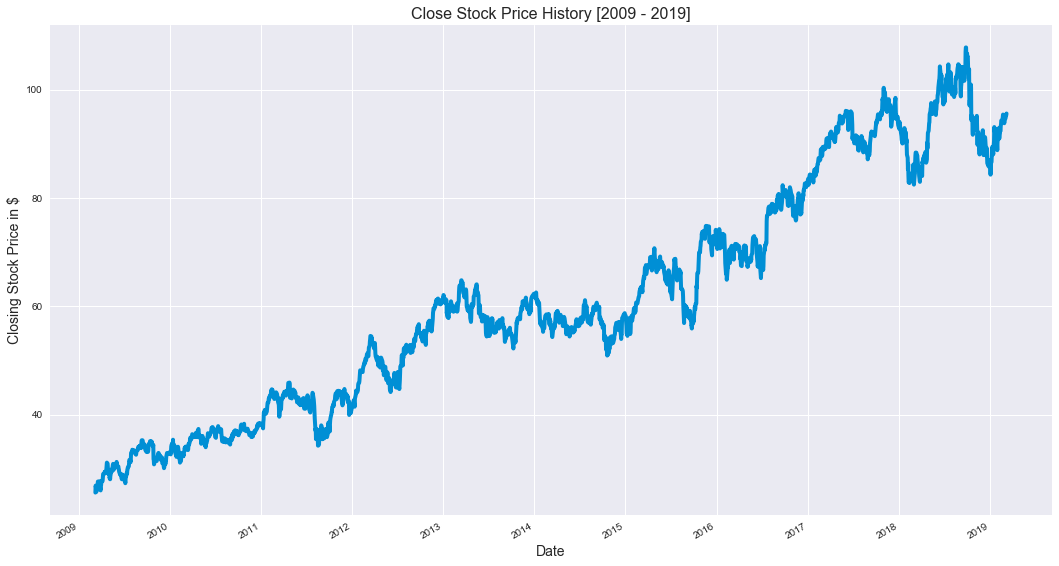

In [ ]:
import matplotlib.dates as mdates

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)

plt.xlabel('Date', fontsize=14)

plt.ylabel('Closing Stock Price in $', fontsize=14)

fig.autofmt_xdate()

plt.show()

### Training a Linear Regression Model

### Train Test Split

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model

In [ ]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model Evaluation

In [ ]:
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
print('Intercept: ', model.intercept_)

Slope:  0.02762424028961455
Intercept:  25.723432313963862


Interpreting the coefficients:

* The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** increases by 0.0276 $
* The **intercept** coefficient is the price at wich the **closing price** measurement started, the stock price value at date zero

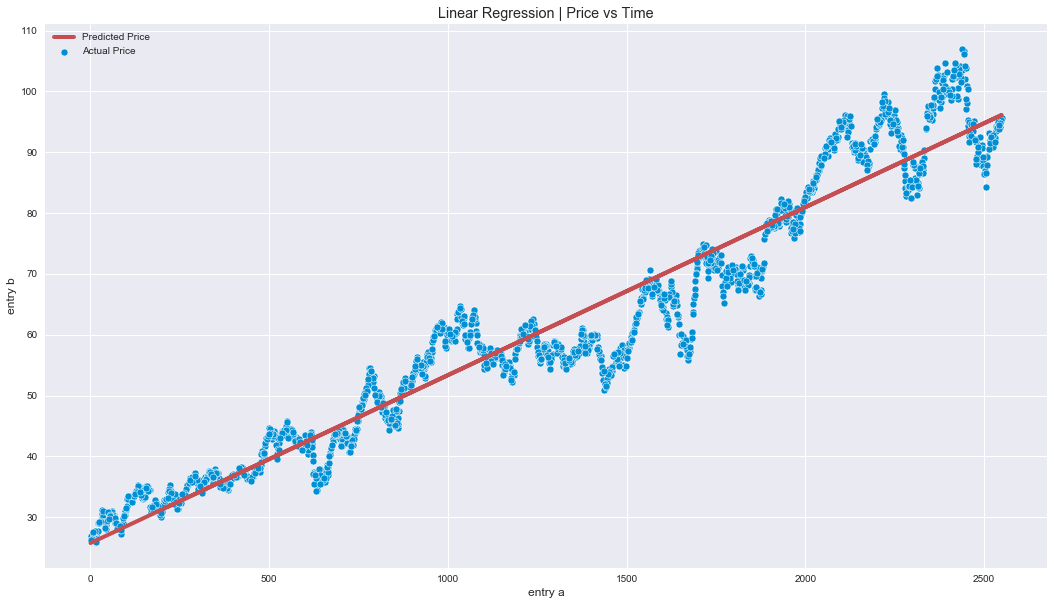

In [ ]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Prediction from our Model

In [ ]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [ ]:
y_pred = model.predict(X_test)

## Regression Evaluation

Let's have a look at how the predicted values compare with the actual value on random sample from our data set.

In [ ]:
df.shape

(2550, 3)

In [ ]:
randints = np.random.randint(2550, size=25)

df_sample = df[df.index.isin(randints)]

In [ ]:
df_sample.head()

Date  Close  Prediction
104 2009-07-31  33.00   28.596353
628 2011-08-12  37.24   43.071455
629 2011-08-15  36.99   43.099079
646 2011-09-07  37.24   43.568692
657 2011-09-22  36.28   43.872558

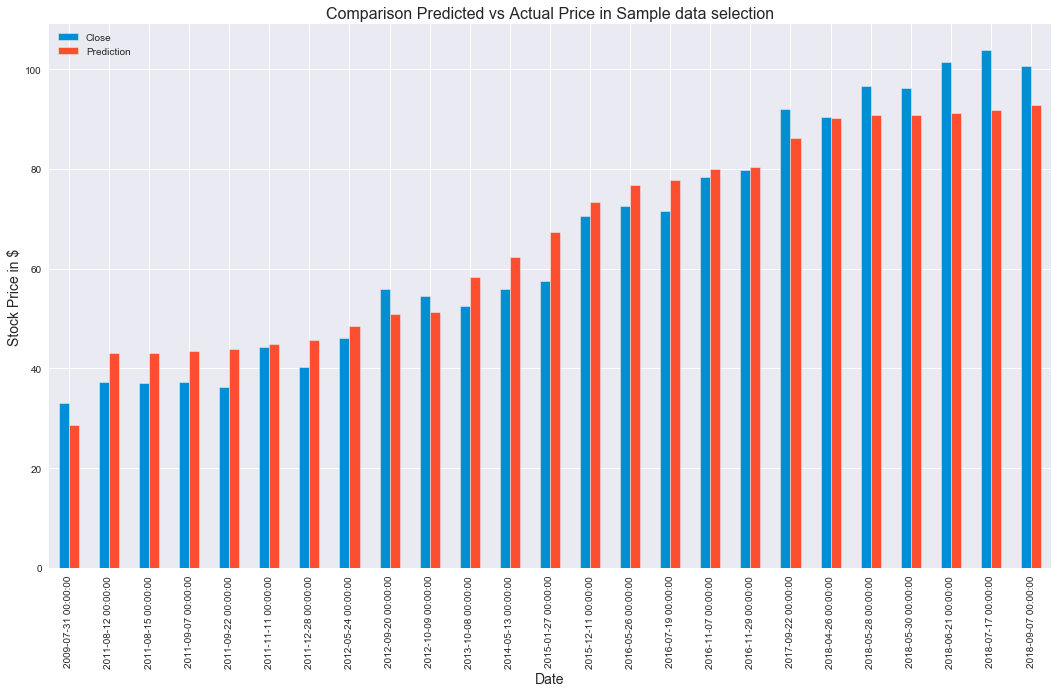

In [ ]:
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price in $', fontsize=14)
plt.show()

We can see some larger variations between predicted and actual values in the random sample.  
Let's see how the model performed over the whole test data set.

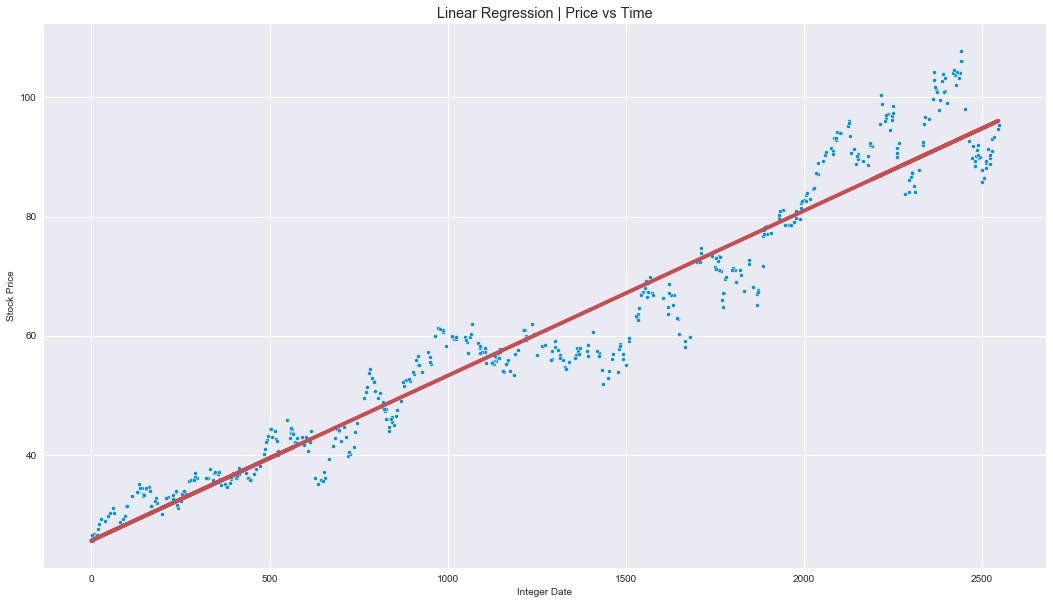

In [ ]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

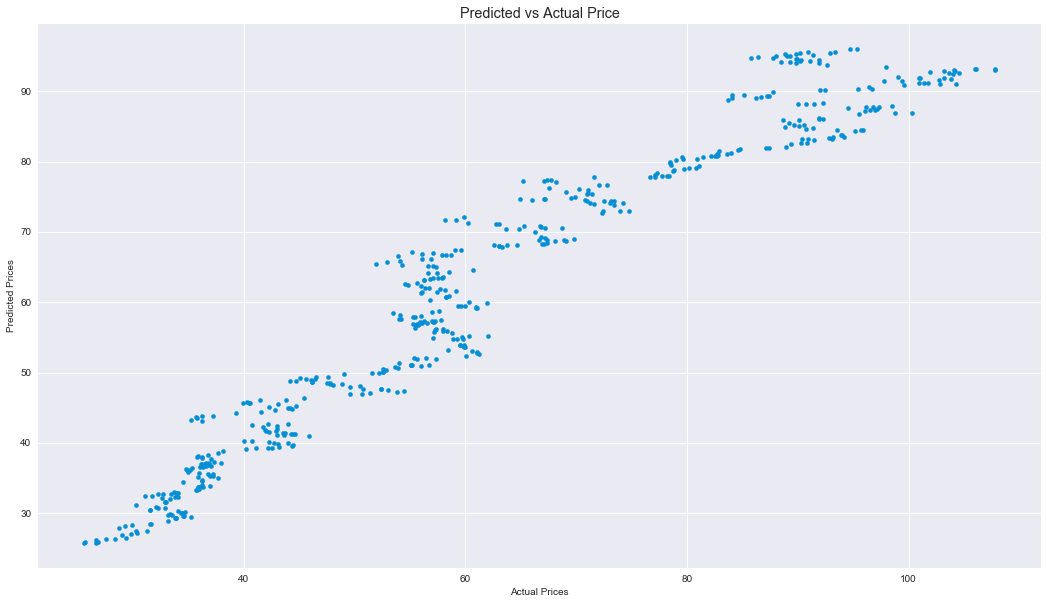

In [ ]:
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

The data points are mostly close to a diagonal, which indicates, that the predicted values are close to the actual value and the model's performance is largerly quite good.  
Yet there are some areas, around 55 to 65, the model seems to be quite random and shows no relationship between the predicted and actual value.  
Also in the area around 85 - 110 the data point are spread out quite heavily and the predictions don't cover the values above 100.

#### Residual Histogram

The residuals are nearly normally distributed around zero, with a slight skewedness to the right.

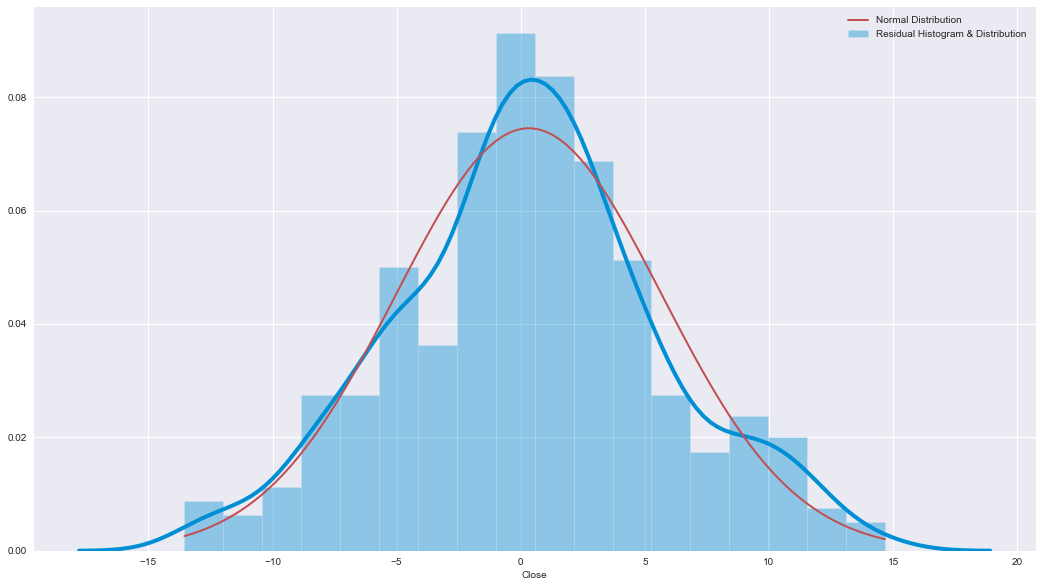

In [ ]:
from scipy.stats import norm
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'r', lw=2, label='Normal Distribution')

plt.legend()
plt.show()

In [ ]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [ ]:
df.head()

Date  Close  Prediction
0 2009-03-09  25.59   25.723432
1 2009-03-10  26.87   25.751057
2 2009-03-11  26.64   25.778681
3 2009-03-12  26.18   25.806305
4 2009-03-13  25.73   25.833929

In [ ]:
# metrics package from sklearn for statistical analysis
from sklearn import metrics

In [ ]:
# Statistical summary of test data
df['Close'].describe()

count    2550.000000
mean       60.995955
std        21.097480
min        25.590000
25%        42.950000
50%        58.015000
75%        77.762500
max       107.800000
Name: Close, dtype: float64

In [ ]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.172498876833842
Mean Squared Error: 28.76248048285447
Root Mean Squared Error: 5.3630663321326235


* The MAE is 3% (of minimum) and 6% (of maximum) of the Closing Price.
* The other two errors are larger, because the errors are squared and have therefore a greater influence on the result.

In [ ]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9395015859480149


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9397266931814002

The value of $R^2$ shows that are model accounts for nearly 94% of the differences between the actual stock prices and the predicted prices.